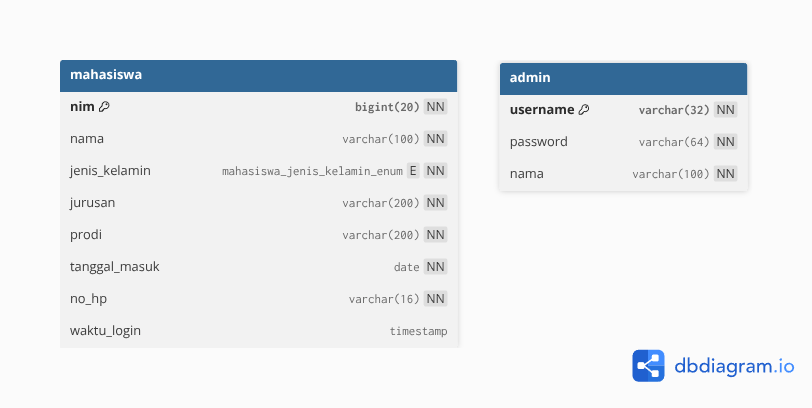

# Pengguna Service API Documentation

## Base URL
```
http://localhost:5002
```

## 1. POST `/login`
### Description
Authenticate **admin** or **mahasiswa** users.

### Request Body
```json
{
  "nim": "123456",
  "password": "secret",
  "jenis": "mahasiswa"
}
```

- `jenis`: `admin` | `mahasiswa`

### Success Response
```json
{
  "authenticated": true,
  "user": {
    "nim": "123456",
    "nama": "Budi",
    "jenis": "mahasiswa"
  }
}
```

In [ ]:
import requests

payload = {
    "nim": "123456",
    "password": "secret",
    "jenis": "mahasiswa"
}
print(requests.post("http://localhost:5002/login", json=payload).json())

## 2. POST `/sync-mahasiswa`
### Description
Synchronize mahasiswa data from external service and publish Redis event.

### Response
```json
{
  "message": "Berhasil sinkronisasi",
  "count": 120
}
```

In [ ]:
print(requests.post("http://localhost:5002/sync-mahasiswa").json())

## 3. GET `/mahasiswa`
### Description
Retrieve all mahasiswa data stored locally.

### Response
```json
{
  "count": 2,
  "mahasiswa": [ ... ]
}
```

In [ ]:
print(requests.get("http://localhost:5002/mahasiswa").json())

## Redis Events
This service publishes **mahasiswa data updates** to Redis:

| Event | Channel | Description |
|------|--------|-------------|
| `mahasiswa_updated` | `mahasiswa_events` | Broadcast mahasiswa data to other services |

Used by **Peminjaman Service** for data consistency.

## Security Notes
- Admin password is validated using **SHA-256** hashing
- Mahasiswa authentication is delegated to external service (`:5001`)
- No token/session handling (stateless API)

## Architectural Notes
- Acts as **Auth + Master Mahasiswa Service**
- Redis ensures eventual consistency
- External API failure will block mahasiswa login
- Suitable for microservice-based systems